# Case Técnico - Rank My App

## Situação

O cliente B4 Bank é um aplicativo do setor financeiro que tem como objetivo conseguir uma **maior visibilidade e retenção de usuários de forma orgânica**. Como esse mercado tem crescido muito e é muito competitivo, ele resolveu investir em ASO com o RankMyApp, focando seus esforços não só em **visualizações mas também em instalações**, ou seja, não apenas os usuários visualizarão o app na loja como também irão instalá-lo e utilizá-lo por um longo período de tempo. (Retenção de 15-30 dias).
Através do nosso sistema, recebemos informações relacionadas às instalações, concorrentes, performance das palavras-chave (keywords), notas e comentários deixados na loja.

## Problema

O B4 Bank é cliente há alguns meses e **eles gostariam de saber como tem sido a performance do app**. Como trabalhamos com ASO para este cliente, o que mais nos interessa são as **métricas de Canal Orgânico**. É a partir deste KPI que nos baseamos para verificar o impacto do nosso trabalho. O cliente também deseja ter **insights sobre o que os usuários estão comentando na loja e qual a sua situação diante dos seus concorrentes**. Realize um estudo utilizando Python para fazer a **limpeza e manipulação de dados e crie um modelo de machine learning com uma das bases**. Depois **crie um relatório ou dashboard com a ferramenta que desejar para apresentar os dados**.

## Processo para o Case

Tendo em vista o problema, a base de dados fornecida e o que foi pedido sobre ele, dividirei minha análise nas seguintes etapas:

1. Exploração
2. Limpeza
3. Manipulação
4. Criação de insights sobre o que os usuários estão comentando na loja - ratings + sentiment; most common words
5. Criação de modelo de machine learning
6. Relatório 

## Importação de Bibliotecas e Leitura dos Dados


In [1]:
# Imports
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime as dt
from natsort import natsorted

#Para Natural Language Processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Para construção de modelos de Machine Learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics  import accuracy_score
from sklearn.pipeline import Pipeline



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cafecoteca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/cafecoteca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
reviews_bank = pd.read_excel('data_scientist_-_case.xlsx', sheet_name=1, parse_dates=['Review Last Update Date and Time'])
retained_bank = pd.read_excel('data_scientist_-_case.xlsx', sheet_name=2, parse_dates=['Date'])

# Exploração 

## Reviews Bank

In [3]:
reviews_bank

,Package Name,App Version Name,Reviewer Language,Device,Review Last Update Date and Time,Star Rating,Review Title,Review Text,Sentiment
0,B4 Bank,6.10.6,pt,greatlte,2019-10-01 00:09:07+00:00,5,NaN,NaN,Positive
1,B4 Bank,6.10.6,pt,mido,2019-10-01 00:18:49+00:00,5,NaN,NaN,Positive
2,B4 Bank,6.10.6,pt,on5xelte,2019-10-01 00:34:35+00:00,5,NaN,Boa,Positive
3,B4 Bank,6.10.6,pt,dreamlte,2019-10-01 00:44:18+00:00,2,NaN,"Não consigo gerar a fatura em PDF, no mesmo fo...",Negative
4,B4 Bank,6.10.6,pt,starqltechn,2019-10-01 01:09:56+00:00,4,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...
5674,B4 Bank,6.10.5,pt,hlte,2019-08-31 21:51:26+00:00,1,NaN,"Baixei a última versão recentemente, ainda não...",NaN
5675,B4 Bank,6.10.5,pt,potter_nt,2019-08-31 22:36:38+00:00,4,NaN,NaN,NaN
5676,B4 Bank,4.1.7,pt,j4primelte,2019-08-31 22:44:22+00:00,5,NaN,NaN,NaN
5677,B4 Bank,6.10.5,pt,K10a40,2019-08-31 23:39:14+00:00,5,NaN,"Gostei muito prático, descomplicado",NaN


In [4]:
# Função auxiliar para exploração geral dos dados
def explore_df(df):
    explore = pd.DataFrame({
        "columns" : df.columns,
        "type": df.dtypes,
        "unique values": df.nunique(),
        "missing values": df.isna().sum(),
        "% of missing values": df.isna().sum()/df.shape[0]*100
    })
    return explore

In [5]:
print("------- DADOS DO BANCO DE REVIEW --------")

explore_df(reviews_bank)

------- DADOS DO BANCO DE REVIEW --------


,columns,type,unique values,missing values,% of missing values
Package Name,Package Name,object,1,0,0.000000
App Version Name,App Version Name,object,50,256,4.507836
Reviewer Language,Reviewer Language,object,9,0,0.000000
Device,Device,object,367,6,0.105652
Review Last Update Date and Time,Review Last Update Date and Time,"datetime64[ns, UTC]",5678,0,0.000000
Star Rating,Star Rating,int64,5,0,0.000000
Review Title,Review Title,object,1,5678,99.982391
Review Text,Review Text,object,2133,2923,51.470329
Sentiment,Sentiment,object,3,4251,74.854728


Considerações:

- Vemos que quase toda a coluna de `Review Title` está faltante, por isso não a utilizarei na análise.
- A coluna de `sentiment` é baseada na coluna de `Star Rating`, que está completa! Assim, imputarei valores de acordo com o Star Rating
- Para análise, utilizarei as colunas: `App Version Name` (removerei as linhas com informações faltantes já que são tão poucas),`Review Last Update Date and Time`, `Star Rating`, `Review Text` (sem imputação) e `Sentiment`
- 

### Limpeza e Manipulação


In [6]:
# Datafram com colunas relevantes
relevant_columns = ['App Version Name', 'Review Last Update Date and Time', 'Star Rating', 'Review Text', 'Sentiment']
reviews = reviews_bank.loc[:,relevant_columns]
reviews

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Sentiment
0,6.10.6,2019-10-01 00:09:07+00:00,5,NaN,Positive
1,6.10.6,2019-10-01 00:18:49+00:00,5,NaN,Positive
2,6.10.6,2019-10-01 00:34:35+00:00,5,Boa,Positive
3,6.10.6,2019-10-01 00:44:18+00:00,2,"Não consigo gerar a fatura em PDF, no mesmo fo...",Negative
4,6.10.6,2019-10-01 01:09:56+00:00,4,NaN,Positive
...,...,...,...,...,...
5674,6.10.5,2019-08-31 21:51:26+00:00,1,"Baixei a última versão recentemente, ainda não...",NaN
5675,6.10.5,2019-08-31 22:36:38+00:00,4,NaN,NaN
5676,4.1.7,2019-08-31 22:44:22+00:00,5,NaN,NaN
5677,6.10.5,2019-08-31 23:39:14+00:00,5,"Gostei muito prático, descomplicado",NaN


In [7]:
# Removendo fileiras com valores faltantes em App Version Name
reviews.dropna(subset=['App Version Name'], inplace=True)
reviews.isna().sum()

App Version Name                       0
Review Last Update Date and Time       0
Star Rating                            0
Review Text                         2784
Sentiment                           4078
dtype: int64

In [8]:
# Imputando valores para a coluna de "sentiment" de acordo com o "Star Rating"
sentiment_values = {
    5: "Positive",
    4: "Positive",
    3: "Neutral",
    2: "Negative",
    1: "Negative"
}

reviews['Sentiment'] = reviews['Star Rating'].map(sentiment_values)

In [9]:
# Adicionando colunas para semana e mês referente para acompanharmos a evolução de variáveis/métricas ao longo do tempo

reviews['week_month'] = reviews['Review Last Update Date and Time'].dt.strftime("%U/%b")

# Ordenar ascendentemente nosso dataset

reviews.sort_values(by='Review Last Update Date and Time', inplace=True,  ignore_index=True)

# Organizar data para formato DD/MM/AAAA

reviews['Date'] = reviews['Review Last Update Date and Time'].dt.strftime("%d/%m/%Y") 

In [10]:
reviews.reset_index()

,index,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Sentiment,week_month,Date
0,0,6.10.0,2019-08-01 00:00:50+00:00,3,"Bom, falta disponibilizar cancelamento de agen...",Neutral,30/Aug,01/08/2019
1,1,6.10.0,2019-08-01 00:13:01+00:00,5,Este aplicativo supre todas as minhas necessid...,Positive,30/Aug,01/08/2019
2,2,6.10.0,2019-08-01 00:14:36+00:00,5,Top 😎,Positive,30/Aug,01/08/2019
3,3,6.10.0,2019-08-01 00:29:12+00:00,4,O app é muito bom. Poderia ser mais intuitivo ...,Positive,30/Aug,01/08/2019
4,4,6.10.0,2019-08-01 00:31:05+00:00,5,funcional,Positive,30/Aug,01/08/2019
...,...,...,...,...,...,...,...,...
5418,5418,6.11.1,2019-10-31 22:29:42+00:00,4,App funciona perfeitamente nas operações que e...,Positive,43/Oct,31/10/2019
5419,5419,6.11.1,2019-10-31 22:56:45+00:00,5,Por enquanto tudo as mil maravilhas!!!!!!,Positive,43/Oct,31/10/2019
5420,5420,6.11.1,2019-10-31 23:14:06+00:00,5,Sempre muito boa!,Positive,43/Oct,31/10/2019
5421,5421,6.11.1,2019-10-31 23:15:09+00:00,5,NaN,Positive,43/Oct,31/10/2019


Com nossos dados da primeira planilha `reviews_bank` organizados e utilizáveis para análise, vamos ajustar o do `retained_bank`

## Retained Bank

In [11]:
print("------- DADOS DO BANCO DE RETENÇÃO --------")
explore_df(retained_bank)

------- DADOS DO BANCO DE RETENÇÃO --------


,columns,type,unique values,missing values,% of missing values
Date,Date,object,92,0,0.0
Package Name,Package Name,object,1,0,0.0
Acquisition Channel,Acquisition Channel,object,4,0,0.0
Store Listing Visitors,Store Listing Visitors,int64,268,0,0.0
Installers,Installers,int64,165,0,0.0
Visitor-to-Installer conversion rate,Visitor-to-Installer conversion rate,float64,184,0,0.0
Installers retained for 1 day,Installers retained for 1 day,int64,151,0,0.0
Installer-to-1 day retention rate,Installer-to-1 day retention rate,float64,138,0,0.0
Installers retained for 7 days,Installers retained for 7 days,int64,144,0,0.0
Installer-to-7 days retention rate,Installer-to-7 days retention rate,float64,160,0,0.0


Felizmente, não temos nenhum valor faltante. Como estamos interessados apenas na retenção de 15 a 30 dias, vindo do canal orgânico, vamos filtrar nossos dados com o que nos interessa.

In [12]:
# Colunas relevantes para nossa análise

relevant_columns_retained = ['Date','Acquisition Channel', 'Installers', 'Visitor-to-Installer conversion rate', 'Installers retained for 15 days','Installer-to-15 days retention rate','Installers retained for 30 days', 'Installer-to-30 days retention rate']

retained = retained_bank.loc[:, relevant_columns_retained]
retained

,Date,Acquisition Channel,Installers,Visitor-to-Installer conversion rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
0,2019-08-01 00:00:00,Organic,414,0.254,335,0.809,330,0.797
1,2019-08-01 00:00:00,Third-party referrers,46,0.089,32,0.696,30,0.652
2,2019-08-01 00:00:00,Other,23,0.204,14,0.609,13,0.565
3,2019-08-02 00:00:00,Organic,407,0.253,330,0.811,322,0.791
4,2019-08-02 00:00:00,Tracked channels (UTM),10,0.182,9,0.900,8,0.800
...,...,...,...,...,...,...,...,...
312,2019-10-29 00:00:00,Other,12,0.218,6,0.500,6,0.500
313,2019-10-30 00:00:00,Organic,545,0.222,386,0.708,374,0.686
314,2019-10-30 00:00:00,Tracked channels (UTM),15,0.072,6,0.400,6,0.400
315,2019-10-30 00:00:00,Third-party referrers,207,0.079,96,0.464,83,0.401


In [13]:
# Filtrando por canal orgânico

retained_organic = retained.loc[retained['Acquisition Channel'] == "Organic"]

Ajustando a coluna de datas para o tipo datetime para que ficasse no mesmo formato dos dados em `reviews_bank`, foi detectado que há um dia incoerente com o mês que ele pertence. Uma análise rápida, levou à entrada com o dia `31/09/2019` que não existe. Essa entrada será, então, removida para que a análise continue.

In [14]:
# Removendo entrada errônea

retained_organic[retained_organic['Date'] == "31/09/2019"] #index 196
retained_organic.drop(index=196, inplace=True)


In [15]:
# Ajustando a data para mesmo formato que o dos dados de review
retained_organic['Date'] = pd.to_datetime(retained_organic['Date'])

# # Adicionando colunas para semana e mês referente para acompanharmos a evolução de variáveis/métricas ao longo do tempo

retained_organic['week_month'] = retained_organic['Date'].dt.strftime("%U/%b")

# # Ordenar ascendentemente nosso dataset

retained_organic.sort_values(by='Date', inplace=True,  ignore_index=True)

# # Organizar data para formato DD/MM/AAAA

retained_organic['Date'] = retained_organic['Date'].dt.strftime("%d/%m/%Y") 

retained_organic

,Date,Acquisition Channel,Installers,Visitor-to-Installer conversion rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate,week_month
0,01/08/2019,Organic,414,0.254,335,0.809,330,0.797,30/Aug
1,02/08/2019,Organic,407,0.253,330,0.811,322,0.791,30/Aug
2,03/08/2019,Organic,401,0.232,348,0.868,340,0.848,30/Aug
3,04/08/2019,Organic,410,0.260,341,0.832,330,0.805,31/Aug
4,05/08/2019,Organic,374,0.251,317,0.848,303,0.810,31/Aug
...,...,...,...,...,...,...,...,...,...
86,26/10/2019,Organic,385,0.181,305,0.792,296,0.769,42/Oct
87,27/10/2019,Organic,413,0.200,357,0.864,348,0.843,43/Oct
88,28/10/2019,Organic,270,0.176,208,0.770,195,0.722,43/Oct
89,29/10/2019,Organic,258,0.195,184,0.713,175,0.678,43/Oct


# Insights

## Ratings e Sentimento

### Quantidade de Ratings 

In [16]:
fig = px.histogram(reviews, x = 'Star Rating', color='Star Rating', title = 'Star Rating')
fig.update_layout(
    xaxis_title_text='Star Rating',
    yaxis_title_text='Quantidade',
    bargap=0.2
)
fig.update_traces(hovertemplate='Star Rating: %{x} <br>Quantidade: %{y}') 
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Análise de Sentimento

In [17]:
fig = px.histogram(reviews, x = 'Sentiment', color='Sentiment', title = 'Sentiment', color_discrete_map={"Neutral": "orange", 'Positive': 'green', 'Negative': 'red' })
fig.update_layout(
    xaxis_title_text='Sentiment', # xaxis label
    yaxis_title_text='Quantidade',
    bargap=0.2
)
fig.update_traces(hovertemplate='Sentiment: %{x} <br>Quantidade: %{y}') 
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

De um modo geral, tanto a os *ratings* como o sentimento dos usuários em relação ao app está muito bom!

### Evolução de Ratings ao longo do tempo

In [18]:
# Agrupando os ratings por dias

reviews_ratings = reviews.loc[:,['week_month', 'Star Rating', 'Date']]
grouped = reviews_ratings.groupby('Date')
ratings_time = grouped.agg(np.mean).reset_index()
ratings_time['Star Rating'] = ratings_time['Star Rating'].round(2)
fig = go.Figure(data=go.Scatter(x = ratings_time['Date'], y= ratings_time['Star Rating'], mode='lines+markers'), layout = go.Layout(height=600, width=1000))

fig.update_layout(
    title_text = 'Evolução Média Star Rating - Dias',
    xaxis_title_text='Sentiment',
    yaxis_title_text='Quantidade',
    bargap=0.2
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [19]:
# Agrupando os ratings por semanas

reviews_ratings = reviews.loc[:,['week_month', 'Star Rating', 'Date']]
grouped = reviews_ratings.groupby('week_month')
ratings_time = grouped.agg(np.mean).reset_index()
ratings_time['Star Rating'] = ratings_time['Star Rating'].round(2)
fig = go.Figure(data=go.Scatter(x = ratings_time['week_month'], y= ratings_time['Star Rating']), layout = go.Layout(height=600, width=1000))

fig.update_layout(
    title_text = 'Evolução Média Star Rating - Semanas',
    xaxis_title_text='Sentiment',
    yaxis_title_text='Quantidade',
    bargap=0.2
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

A evolução dos *ratings* com o tempo se apresenta instável, mas mesmo assim se mantém acima do 4.2, o que é bom.

### Ratings por versão do app

In [20]:
# Agrupando os ratings por versão do app

reviews_ratings = reviews.loc[:,['App Version Name', 'Star Rating']]
grouped = reviews_ratings.groupby('App Version Name')
ratings_unsorted = grouped.agg(np.mean).reset_index()
sorted_version = pd.DataFrame({'app_version':natsorted(ratings_unsorted['App Version Name'])})
ratings_app_version = pd.merge(sorted_version, ratings_unsorted, how='left', left_on='app_version', right_on='App Version Name')
ratings_app_version['Star Rating'] = ratings_app_version['Star Rating'].round(2)

In [21]:
fig = go.Figure(data=go.Scatter(x = ratings_app_version['App Version Name'], y = ratings_app_version['Star Rating'], mode='lines+markers'), layout = go.Layout(height=600, width=1000))
fig.update_layout(
    title_text = 'Evolução Média Star Rating - Versão App',
    xaxis_title_text='Sentiment',
    yaxis_title_text='Quantidade'
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Vemos que nas últimas versões, o app vem se tornando mais estável, com menos flutuações de *ratings* e mantendo uma boa média acima de 4.

##  Taxa de Retenção para 15 e 30 dias

In [22]:
fig = go.Figure(layout = go.Layout(height=600, width=1000))
fig.add_trace(go.Scatter(x = retained_organic['Date'], y = retained_organic['Installer-to-15 days retention rate'], name='15 dias',mode='lines+markers'))
fig.add_trace(go.Scatter(x = retained_organic['Date'], y = retained_organic['Installer-to-30 days retention rate'], name='30 dias',mode='lines+markers'))
fig.update_layout(
    title_text = 'Taxa de retenção 15 e 30 dias',
    xaxis_title_text='Data',
    yaxis_title_text='Taxa retenção %'
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [23]:
# Por semana

retained_rate = retained_organic.loc[:,['week_month', 'Installer-to-15 days retention rate', 'Installer-to-30 days retention rate']]
grouped = retained_rate.groupby('week_month')
retained_rate_week = grouped.agg(np.mean).reset_index()

In [24]:
fig = go.Figure(layout = go.Layout(height=600, width=1000))
fig.add_trace(go.Scatter(x = retained_rate_week['week_month'], y = retained_organic['Installer-to-15 days retention rate'], name='15 dias'))
fig.add_trace(go.Scatter(x = retained_rate_week['week_month'], y = retained_organic['Installer-to-30 days retention rate'], name='30 dias'))
fig.update_layout(
    title_text = 'Taxa de retenção 15 e 30 dias',
    xaxis_title_text='Data',
    yaxis_title_text='Taxa retenção %'
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

A taxa de rentenção teve uma queda brusca nos últimos dias do mês de outubro e na segunda e terceira semana do mesmo mês. A média da última semana, no entanto, subiu.

# Modelo de Machine Learning

Para esse case, será desenvolvido um modelo que classifica o `sentiment` do usuário de acordo com seu *review*.

Primeiro, vamos analisar os reviews que já temos para só depois construir nosso classificador.

## Analisando os Reviews

A análise das reviews se dará através de mapeamento dos termos, tanto isolados quanto em pares. Assim, por exemplo, serão contabilizados tanto termos "ótimo" (isolados) como "muito bom" (em pares).

In [25]:
# Isolando dataset para o modelo de ML

reviews_text = reviews.loc[:,['Review Text', 'Sentiment']]
reviews_text.dropna(inplace=True)
reviews_text.reset_index(drop=True, inplace=True)

In [26]:
# Transformando todos os reviews em um corpo só
reviews_concat = reviews_text['Review Text'].str.cat(sep=' ')

#Stopwords
stopwords_list = ['de', 'a', 'o', 'O', 'que','q', 'e', 'do', 'da', 'em', 'um', 'que', 'para','fica', 'com','nao', 'sim', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'sempre','há', 'nos', 'para','pra', 'ja', 'está', 'eu', 'também', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'voce', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'ha', 'havemos', 'hao', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'fica', 'ficou','ir', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'sera', 'seremos', 'serao', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam', 'app', 'App','APP', 'aplicativo', 'fazer', 'faz', 'só', 'mas','uso', 'todos', 'todas','todo', 'toda', 'tudo', 'vezes', 'dia', 'agora', 'pois', 'ainda', 'Ainda', 'cada', 'algum', 'alguns', 'algumas', 'vez', 'nada', 'nem', 'após','Após', 'dá', 'dar', 'deve', 'deveria', 'acho', 'banco','consigo', 'usar', 'b4', 'bank', '!', ',', '/', '.', '...', '``', '..', '....', '(', ')', '?', ':', "''"]

stopwords_portuguese = set(stopwords_list)

# Instanciando módulo para vetorização e tokens
count_vect = CountVectorizer(stop_words=stopwords_list, lowercase=True, strip_accents='ascii', ngram_range = (1,2))
analyzer = count_vect.build_analyzer()

# Listando todas as palavras que aparecem
tokens = analyzer(reviews_concat)



In [27]:
tokens = [word for word in tokens if not word in stopwords_portuguese]
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)
words_df = pd.DataFrame({
    'words' : list(frequency_dist.keys()),
    'frequency': list(frequency_dist.values())
    })
words_df.sort_values(by='frequency', ascending=False, inplace=True)
# words_df.iloc[:50]

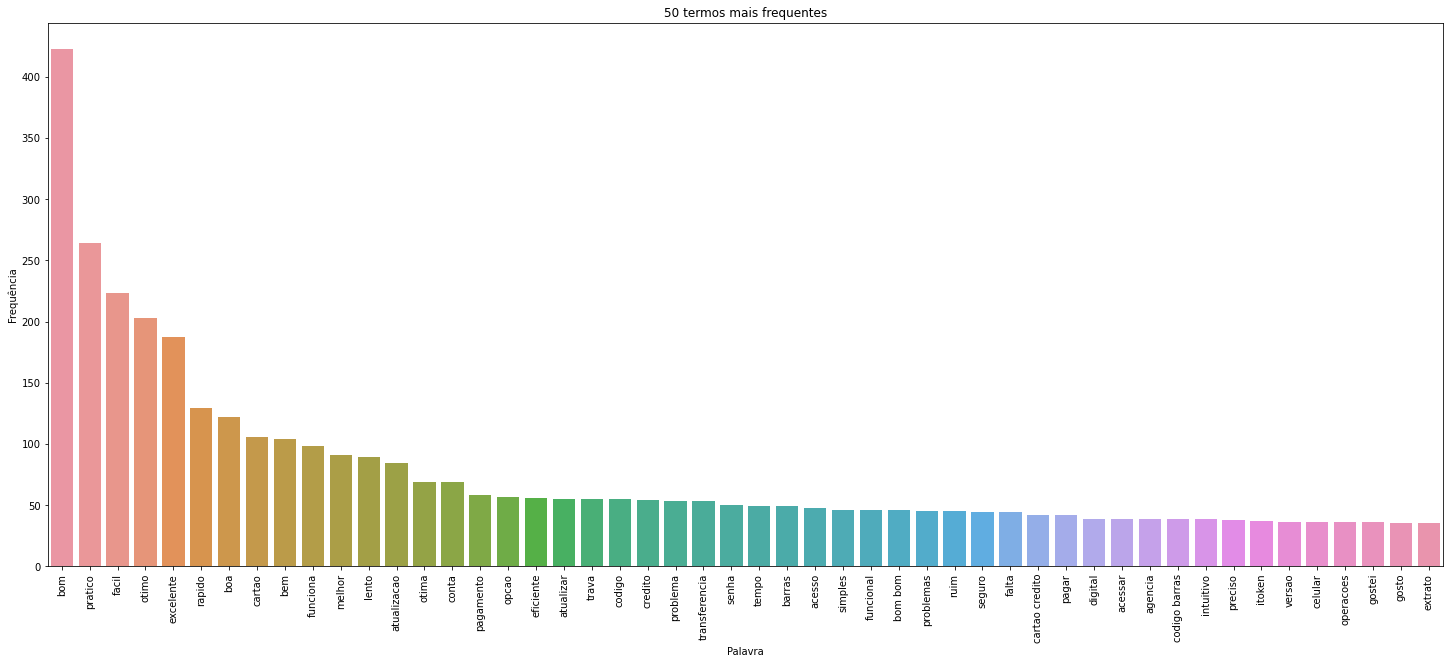

In [28]:
plt.figure(figsize=(25,10))
words_df_50 = words_df.iloc[0:50]
ax = sns.barplot(x='words', y='frequency', data=words_df_50)
ax.set_title('50 termos mais frequentes')
ax.set_ylabel('Frequência')
ax.set_xlabel('Palavra')
plt.xticks(rotation=90)
plt.show()

Vemos que os termos que mais aparecem são positivos para o aplicativo!

## Construindo um Classificador para *Sentiment Analysis*

Para a construção do classificador, irei utilizar como parâmetro para relavância dos termos nas *reviews* o método de **TD-IDF**. Após, irei testar 3 algoritmos de *Machine Learning* para, a partir da métrica de acurácia de cada um, escolher o melhor. Esses métodos serão: *Suport Vector Machine*, *Naives Bayes* e *Logistic Regression*.

In [29]:
# Dividindo nosso dataset em treino e teste

size = reviews_text.shape[0]
size_train = round(0.70* size)
size_test = size - size_train
print(f'size_train is {size_train} and size_test is {size_test}')

size_train is 1847 and size_test is 792


In [30]:
X_train = reviews_text.loc[:size_train, 'Review Text'].values
y_train = reviews_text.loc[:size_train, 'Sentiment'].values
X_test = reviews_text.loc[(size_train+1):, 'Review Text'].values
y_test = reviews_text.loc[(size_train+1):, 'Sentiment'].values

In [31]:
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)


In [32]:
tfidf_transformer = TfidfTransformer()
train_vectors = tfidf_transformer.fit_transform(X_train_counts)
test_vectors = tfidf_transformer.transform(X_test_counts)
print(train_vectors.shape, test_vectors.shape)

(1848, 8585) (791, 8585)


In [33]:

from sklearn.metrics import mean_absolute_error
ml_algorithms = {'LinearSVC' : LinearSVC(), 'MultinomialNB': MultinomialNB(), 'LogisticRegression': LogisticRegression()}

for model in ml_algorithms:
    clf = ml_algorithms[model].fit(train_vectors, y_train)
    predicted = clf.predict(test_vectors)
    print(f'---------- {model} ----------\n')
    print('Accuracy: ',accuracy_score(y_test,predicted), '\n')


---------- LinearSVC ----------

Accuracy:  0.8495575221238938 

---------- MultinomialNB ----------

Accuracy:  0.7850821744627055 

---------- LogisticRegression ----------

Accuracy:  0.8445006321112516 



Assim, o modelo escolhido para nosso problema será o de `LinearSVC`

Agora, para melhor sumarizar e deixar nosso processo de construção deste modelo mais escalável, irei construir uma simples *pipeline*.

## Pipeline do modelo de *Machine Learning* escolhido

In [34]:
reviews_classifier = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

# Testando nossa pipeline

reviews_classifier.fit(X_train, y_train)
predicted = reviews_classifier.predict(X_test)
print(f'---------- {model} ----------\n')
print('Accuracy: ',accuracy_score(y_test,predicted), '\n')


---------- LogisticRegression ----------

Accuracy:  0.8495575221238938 



# Considerações Finais

Com os dados disponibilizados e as análises feitas neste relatório, vemos que o aplicativo do B4 Bank tem um desempenho no geral muito bom. As métricas utilizadas de acompanhamento de *star ratings* e *sentiment* não só no tempo, mas também na versão do aplicativo, são importantes para a avaliação do desempenho do aplicativo e seus *releases*. Essas métricas, tendo o manuseio adequado dos dados aqui feito, são facilmente construídas dentro de ferramentas de visualização/*dashboards*.

Quanto aos modelos de *machine learning* utilizados, teve-se uma boa acurácia(85%) mesmo utilizando hiperparâmetros *default* dentro das opções testadas.
